In [1]:
import datetime
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from data_analyzing.schedule import AnalyzeSchedule

In [3]:
from data_analyzing.statistics import General

In [4]:
start_time = datetime.datetime(2020, 5, 24, 11, 7, 0)
stop_time = datetime.datetime(2020, 5, 24, 18, 7, 0)
time_periods, count = AnalyzeSchedule.count_vehicle_per_time(start_time, stop_time, 2)

<IPython.core.display.Javascript object>


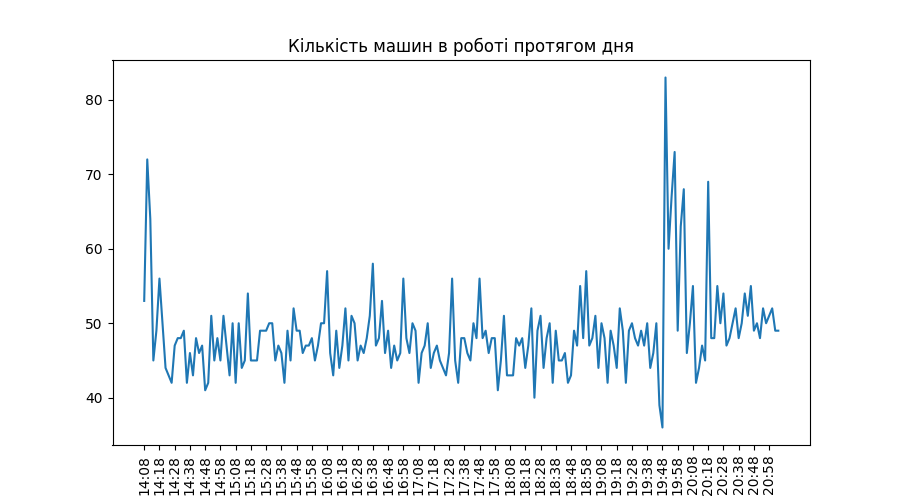

In [13]:
plt.figure(figsize=(9, 5))
plt.plot(range(len(count)), count)
plt.xticks(range(len(count))[::5], time_periods[::5], rotation='vertical')
plt.title("Кількість машин в роботі протягом дня")
plt.show()

In [2]:
speeds = General.get_all_speeds()

<IPython.core.display.Javascript object>


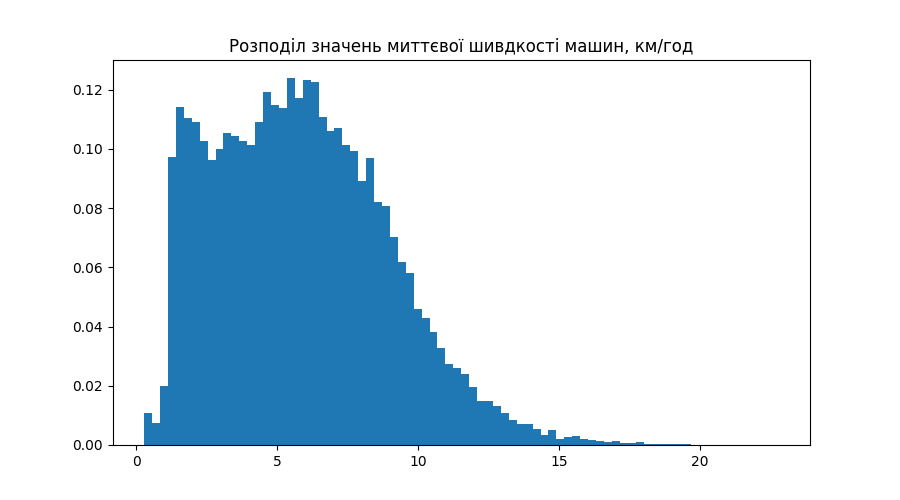

In [14]:
plt.figure(figsize=(9, 5))
plt.title("Розподіл значень миттєвої шивдкості машин, км/год")
plt.hist(speeds, density=True, bins=80)
plt.show()

Статистичні показники швидкості:

In [13]:
speeds_arr = np.array(speeds)

print("Mean: ", np.mean(speeds_arr))
print("Median: ", np.median(speeds_arr))
print("Mode: ", stats.mode(speeds_arr))
print("Max: ", np.max(speeds_arr, axis=0))

Mean:  5.947099981322591
Median:  5.833333492279053
Mode:  ModeResult(mode=array([5.55555582]), count=array([1000]))
Max:  22.77777862548828


<IPython.core.display.Javascript object>


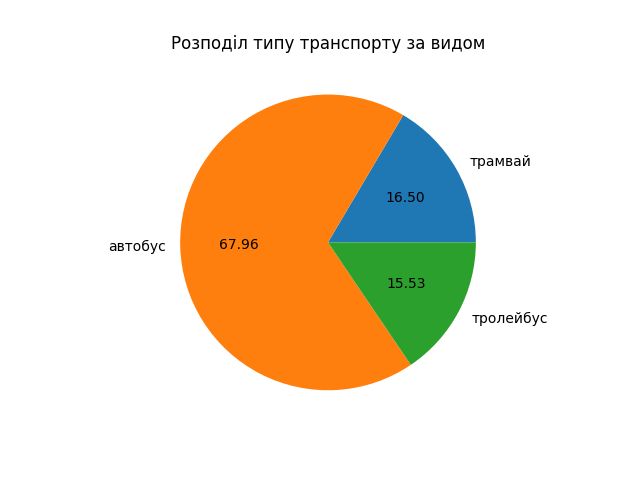

In [7]:
count_types_dict = General.count_types_vehicle()
plt.title("Розподіл типу транспорту за видом")
plt.pie(count_types_dict.values(), labels=count_types_dict.keys(), autopct='%.2f')
plt.show()

In [4]:
all_miss = AnalyzeSchedule.get_all_miss()

<IPython.core.display.Javascript object>


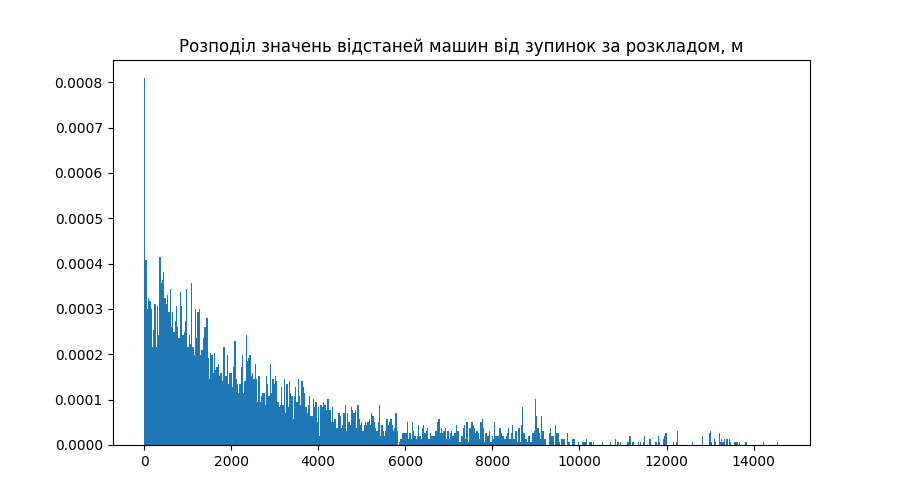

In [12]:
plt.figure(figsize=(9, 5))
plt.title("Розподіл значень відстаней машин від зупинок за розкладом, м")
plt.hist(all_miss, density=True, bins=500)
plt.show()

Статистичні показники значень відстаней машин від зупинок за розкладом:

In [13]:
all_miss_arr = np.array(all_miss)

print("Mean: ", np.mean(all_miss_arr))
print("Median: ", np.median(all_miss_arr))
print("Mode: ", stats.mode(all_miss_arr))
print("Max: ", np.max(all_miss_arr, axis=0))

Mean:  2684.1667528937837
Median:  1846.8303639440996
Mode:  ModeResult(mode=array([0.52875513]), count=array([1]))
Max:  14567.737578571085


In [5]:
start_time = datetime.datetime(2020, 5, 24, 11, 7, 0)
stop_time = datetime.datetime(2020, 5, 24, 17, 0, 0)
time_periods_miss, count_avg_miss = AnalyzeSchedule.calculate_average_miss(start_time, stop_time, 5)

<IPython.core.display.Javascript object>


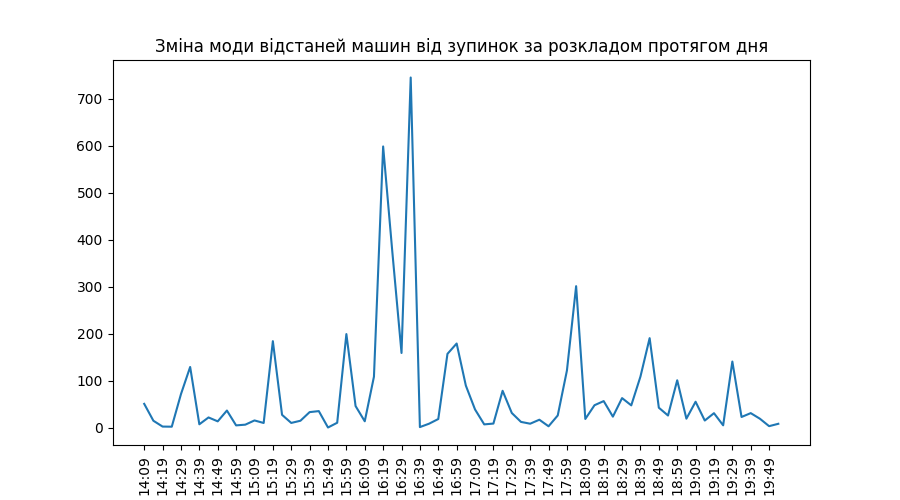

In [6]:
plt.figure(figsize=(9, 5))
plt.plot(range(len(count_avg_miss)), count_avg_miss)
plt.xticks(range(len(count_avg_miss))[::2], time_periods_miss[::2], rotation='vertical')
plt.title("Зміна моди відстаней машин від зупинок за розкладом протягом дня")
plt.show()

In [7]:
time_periods_miss, count_percentage_miss = AnalyzeSchedule.calculate_percentage_schedule_hit(start_time, stop_time, 5)

<IPython.core.display.Javascript object>


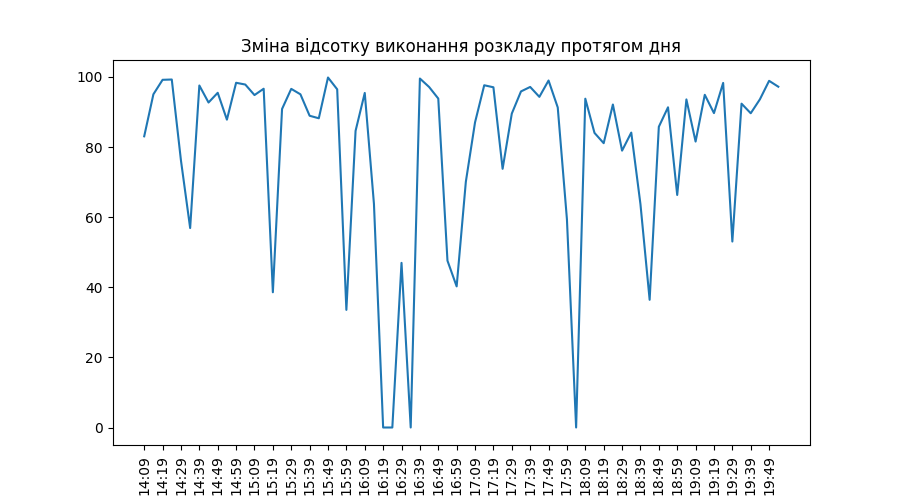

In [8]:
plt.figure(figsize=(9, 5))
plt.plot(range(len(count_percentage_miss)), count_percentage_miss)
plt.xticks(range(len(count_percentage_miss))[::2], time_periods_miss[::2], rotation='vertical')
plt.title("Зміна відсотку виконання розкладу протягом дня")
plt.show()

<IPython.core.display.Javascript object>


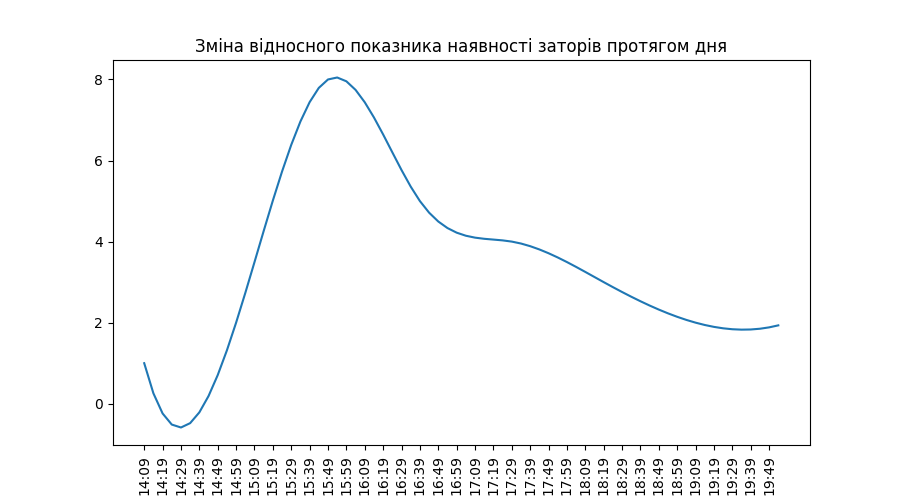

In [21]:
x = np.linspace(0, len(count_avg_miss), num=8, endpoint=True)
y = np.array([1, 2, 8, 5, 4, 3, 2, 2])
y2 = interp1d(x, y, kind='cubic')
x_traffic = range(len(count_avg_miss))
y_traffic = [y2(val) for val in x_traffic]
plt.figure(figsize=(9, 5))
plt.plot(x_traffic, y_traffic)
plt.title("Зміна відносного показника наявності заторів протягом дня")
plt.xticks(range(len(count_avg_miss))[::2], time_periods_miss[::2], rotation='vertical')
plt.show()

<IPython.core.display.Javascript object>


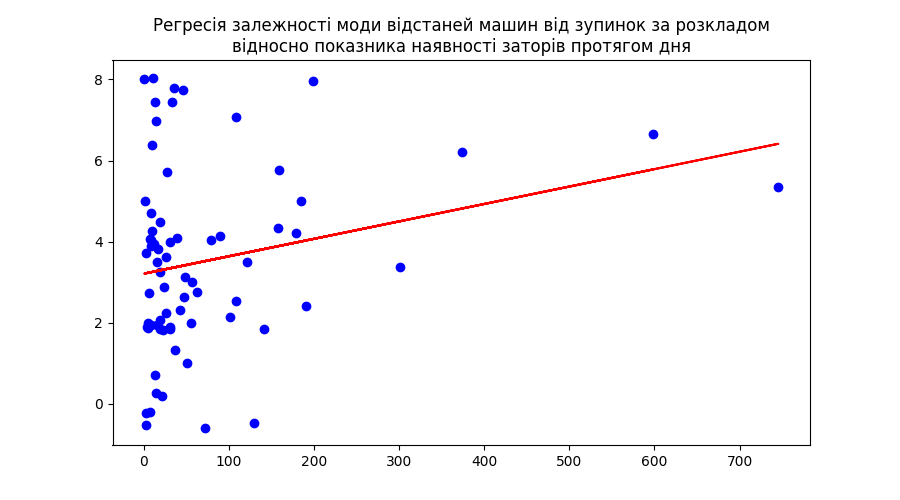

In [25]:
x = np.array(count_avg_miss).astype(float)
y = y_traffic
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(9, 5))
plt.title("Регресія залежності моди відстаней машин від зупинок за розкладом\n" \
          "відносно показника наявності заторів протягом дня")
plt.plot(x,y,'ob')
plt.plot(x, intercept + slope*x, 'r',)
plt.show()